<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/speed.png?raw=true" width=800 align="left"/>

# 실습 내용

- Cars 데이터를 불러와 살펴봅니다.
- 단순 선형회귀 모델을 만들고 평가합니다.
- 특히 회귀 계수를 명확히 이해합니다.
- 예측 결과를 시각화합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
# path = 'https://raw.githubusercontent.com/Jangrae/csv/master/cars.csv'
path = 'https://bit.ly/CarsFile'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.
- speed: 자동차 속력 dist: 제동거리

In [4]:
# 상위 몇 개 행 확인
data.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [5]:
# 하위 몇 개 행 확인
data.tail()

,speed,dist
45,24,70
46,24,92
47,24,93
48,24,120
49,25,85


In [6]:
# 기초통계량 확인
data.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


In [7]:
# NaN 값 확인
data.isnull().sum()

speed    0
dist     0
dtype: int64

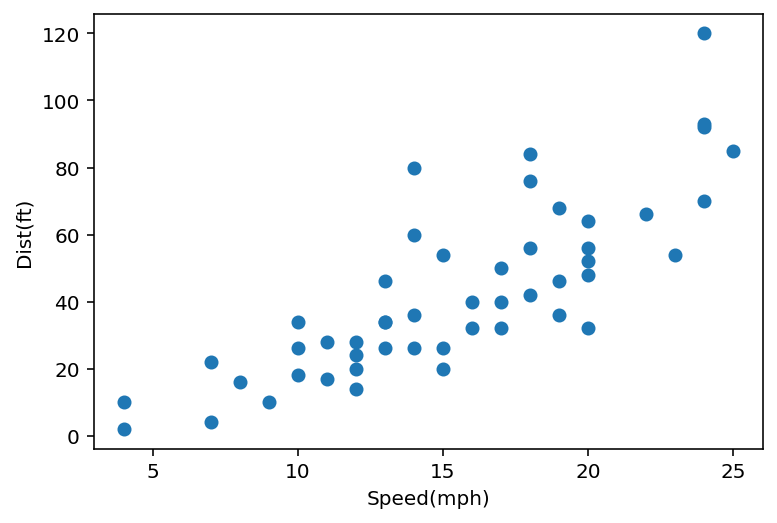

In [8]:
# speed, dist 관계
plt.scatter(x='speed', y='dist', data=data)
plt.xlabel('Speed(mph)')
plt.ylabel('Dist(ft)')
plt.show()

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

- target 변수를 명확히 지정합니다.
- target을 제외한 변수를 x 데이터프레임으로 선언합니다.
- y 데이터프레임은 target 변수만을 가집니다.

In [9]:
# target 확인
target = 'dist'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**2) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [10]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)  

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.

In [11]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression

In [12]:
# 2단계: 선언하기
model = LinearRegression()

In [14]:
# 3단계: 학습하기
model.fit(x_train,y_train)

LinearRegression()

In [24]:
# 회귀계수 확인
print('가중치:',model.coef_[0])
print('편향:',model.intercept_)

가중치: 3.8630975143403417
편향: -17.07724665391965


$\large dist = 3.86*speed -17.07$

**마크다운에 수식 쓰는 방법** 

In [16]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [21]:
# 5단계: 평가하기
from sklearn.metrics import mean_absolute_error, r2_score
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

10.337667304015294
0.7308201428360215


In [18]:
y_pred

array([79.5001912 , 60.18470363, 67.91089866,  9.96443595, 25.416826  ,
       21.55372849, 56.32160612, 60.18470363, 21.55372849, 75.63709369,
       37.00611855, 25.416826  , 13.82753346, 40.86921606, -1.6248566 ])

In [19]:
y_test

49     85
38     32
43     66
3      22
9      17
6      18
35     36
42     64
7      26
48    120
20     36
10     28
4      16
25     54
0       2
Name: dist, dtype: int64

# 5.기타

- 기타 필요한 내용이 있으면 진행합니다.

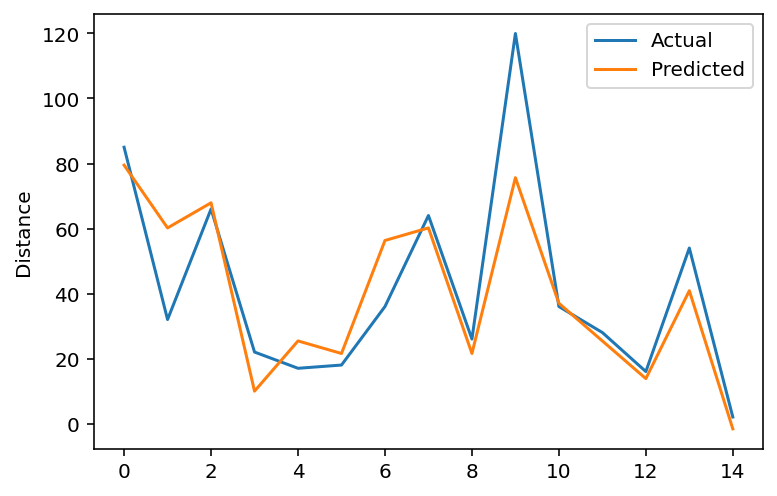

In [27]:
# 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.ylabel('Distance')
plt.show()

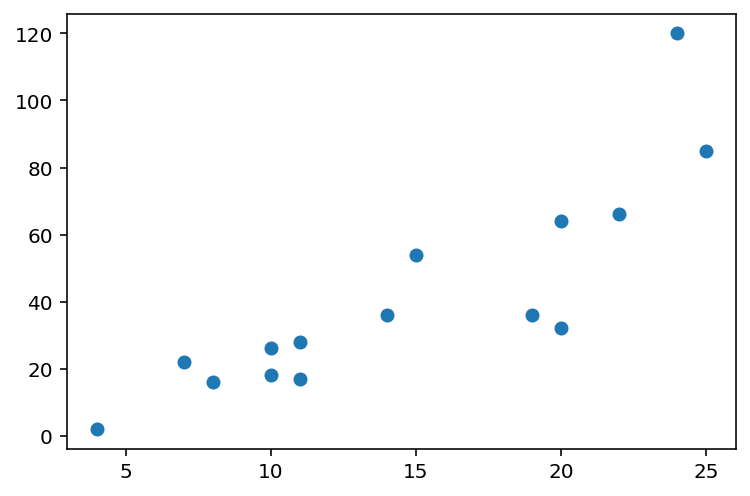

In [29]:
plt.scatter(x_test,y_test)

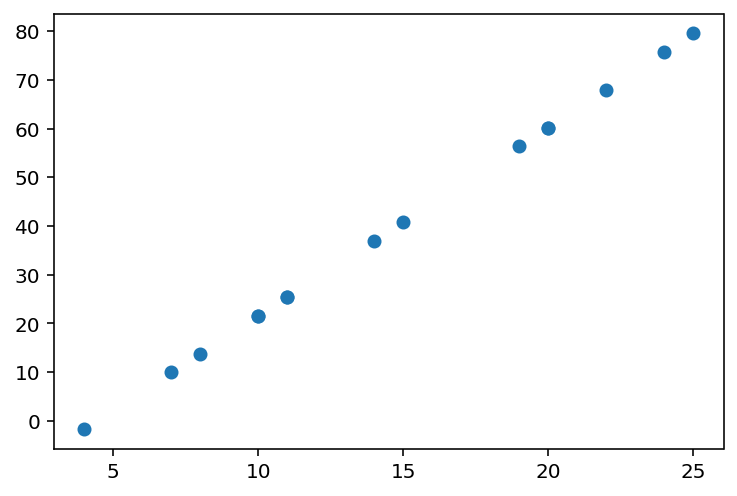

In [30]:
plt.scatter(x_test,y_pred)

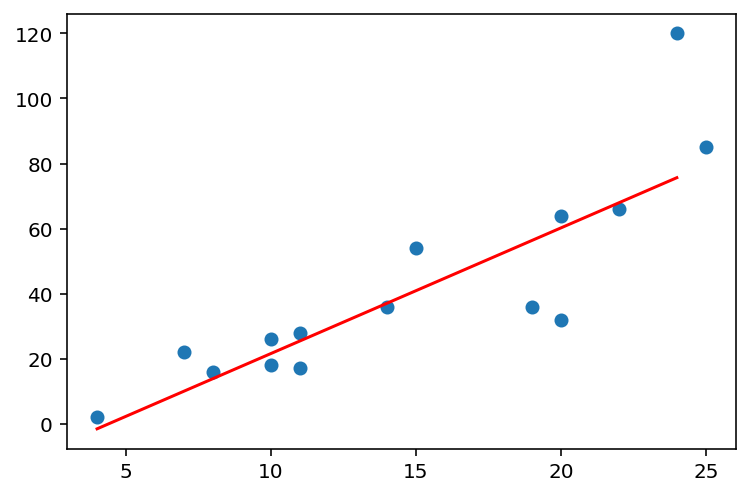

In [39]:
a = model.coef_
b = model.intercept_
x = np.linspace(x_train.min(),x_train.max(),10)
y = a * x + b

# 여기서 구한 직선은 train데이터에 최적화된 직선임. 

plt.plot(x,y,color='r')
plt.scatter(x_test,y_test)
plt.show()